# Machine Learning Approach for Estimating Groundwater Origin in the Baltic basin


<div>
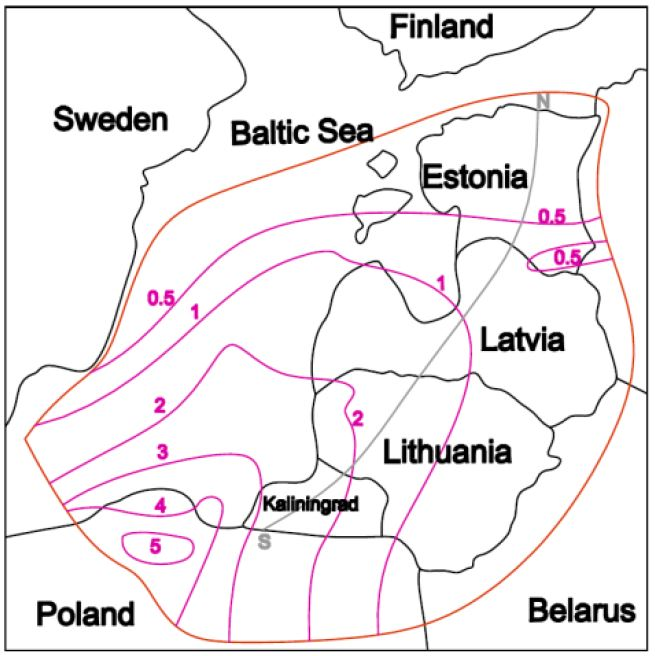
</div>
Location of the Baltic Artesian Basin.  Brown line - the BAB boundary, purple lines and numbers - crystalline basement depth below sea level (km). After: Juodkazis, 1980a, 1980b; Mokrik et al., 2021; Pärn et al., 2016; Virbulis et al., 2013.

## Target
The chemical and isotopic composition of the groundwater depends on the depth and location the sample was taken. The basic chemical content may suggest the origin of the groundwater. Four classification models were applied to estimate Baltic groundwater's state-depth category with input hydrochemistry data.

## Import data and libraries

In [256]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.axes 
from sklearn import preprocessing 
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

df = pd.read_csv('data_water_content_state.csv')

df.head(6)

,well_no,site,index,state_depth,depth,pH,oxygen_18,chloride,sulfate,bicarbonate,sodium,potassiun,magnesium,calcium,alteration_degree,tds
0,11851,Võisiku,O-Cm,EST_Intermediate,315.0,8.3,-15.3,84,24.0,207.0,102.0,7.0,6.0,20.0,2.0,451
1,4486,Parnu,O-Cm,EST_Intermediate,400.0,7.9,-14.0,714,29.0,214.0,500.0,9.0,18.0,34.0,12.0,1518
2,3,Pernu,O-Cm,EST_Intermediate,420.0,NaN,-13.7,788,25.0,317.0,555.0,NaN,21.0,42.0,8.9,1748
3,7298,Viljandi,O-Cm,EST_Intermediate,420.0,8.2,-15.6,475,29.0,110.0,309.0,7.0,13.0,28.0,14.9,970
4,3950,Varska commune Varska,O-Cm,EST_Intermediate,485.0,7.9,-14.4,987,16.0,234.0,566.0,16.0,32.0,87.0,13.7,1939
5,SG-1,Pernu,Cm-V,EST_Intermediate,485.0,NaN,-19.1,2414,25.0,182.0,1064.0,NaN,85.0,365.0,38.3,4135


## Data Overview
The population of samples is in the depth range of 0-2000 m. The data covers Baltic countries (EST - Estonia, LV - Latvia, LT - Lithuania, K - Kaliningrad district). Samples are categorized according to circulation rate and state: Shallow - active exchange, Intermediate - delayed exchange, Deep - stagnant water.

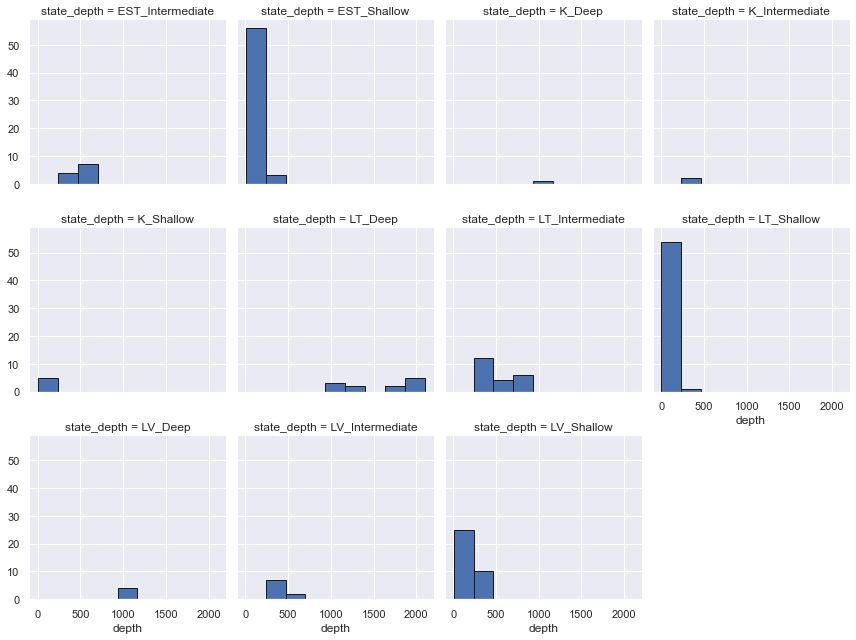

In [257]:
bins = np.linspace(df.depth.min(), df.depth.max(), 10)
g = sns.FacetGrid(df, col='state_depth', palette="Set1", col_wrap=4)
g.map(plt.hist, 'depth', bins=bins, ec="k")


plt.show()

Chloride, as well as other components, content increases with depth. The figure below represents this trend in the Baltic states.

Text(40000, 1200, 'y=0.02 x + 145')

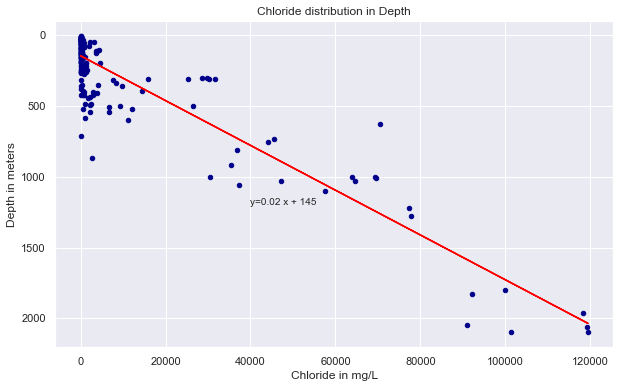

In [258]:

df.plot(kind='scatter', x='chloride', y='depth', figsize=(10, 6), color='darkblue')

plt.title('Chloride distribution in Depth')
plt.xlabel('Chloride in mg/L')
plt.ylabel('Depth in meters')
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

x = df['chloride']      
y = df['depth']     
fit = np.polyfit(x, y, deg=1)

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.annotate('y={0:.2f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(40000, 1200))






Baltic groundwater could be classified depending on its location and depth. The figure below represents categories in the oxygen-18 vs. chloride plot. A similar approach may be applied using magnesium, sodium, potassium, and other chemical data. Machine learning algorithms are due for this task.   

(0.1, 1122018.4543019629)

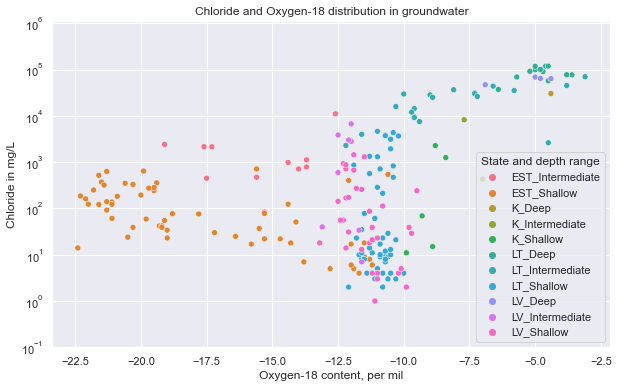

In [259]:
sns.set(rc={"figure.figsize":(10, 6)})
plot1=sns.scatterplot(x='oxygen_18', y='chloride', hue='state_depth', data=df);
plt.title('Chloride and Oxygen-18 distribution in groundwater')
plt.ylabel('Chloride in mg/L')
plt.xlabel('Oxygen-18 content, per mil')
plt.legend(title='State and depth range')
#legend(title="Delivery Type");
plot1.set(yscale="log")
plt.ylim(0.1, )

## Pre-processing 
Columns well_no, site, index, and depth data are complementary; therefore, they are not fit for machine learning algorithms. TDS and alteration_degree data are derived from the rest parameters and should be excluded as well.

In [260]:
df.columns

Index(['well_no', 'site', 'index', 'state_depth', 'depth', 'pH', 'oxygen_18',
       'chloride', 'sulfate', 'bicarbonate', 'sodium', 'potassiun',
       'magnesium', 'calcium', 'alteration_degree', 'tds'],
      dtype='object')

In [261]:
dfi = df[['pH',
       'oxygen_18', 'state_depth', 'chloride', 'sulfate', 'bicarbonate', 'sodium',
       'potassiun', 'magnesium', 'calcium']]
#dfi.state_depth = pd.Categorical(dfi.state_depth)
#dfi['code'] = dfi.state_depth.cat.codes
dfi=dfi.dropna(axis=0).reset_index(drop=True)
dfj = dfi['state_depth']
dfi.drop('state_depth', inplace=True, axis=1)
#dfi.drop('code', inplace=True, axis=1)


## Set features

In [262]:
X = dfi.values
y = dfj
X[0:5]
y[0:30]

0     EST_Intermediate
1     EST_Intermediate
2     EST_Intermediate
3     EST_Intermediate
4     EST_Intermediate
5     EST_Intermediate
6     EST_Intermediate
7          EST_Shallow
8          EST_Shallow
9          EST_Shallow
10         EST_Shallow
11         EST_Shallow
12         EST_Shallow
13         EST_Shallow
14         EST_Shallow
15         EST_Shallow
16         EST_Shallow
17         EST_Shallow
18         EST_Shallow
19         EST_Shallow
20         EST_Shallow
21         EST_Shallow
22         EST_Shallow
23         EST_Shallow
24         EST_Shallow
25         EST_Shallow
26         EST_Shallow
27         EST_Shallow
28         EST_Shallow
29         EST_Shallow
Name: state_depth, dtype: object

## Data Standartization

In [263]:
X= preprocessing.StandardScaler().fit(X).transform(X)

X[0:1]

array([[ 1.17, -0.53, -0.34, -0.43, -0.23, -0.35, -0.33, -0.22, -0.29]])

 ## Model1. K Nearest Neighbor (KNN)

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135, 9) (135,)
Test set: (34, 9) (34,)


In [265]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
kneigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = kneigh.predict(X_test)
yhat[0:3]

array(['LT_Shallow', 'LT_Shallow', 'LT_Shallow'], dtype=object)

Train set Accuracy:  0.8296296296296296
Test set Accuracy:  0.7352941176470589


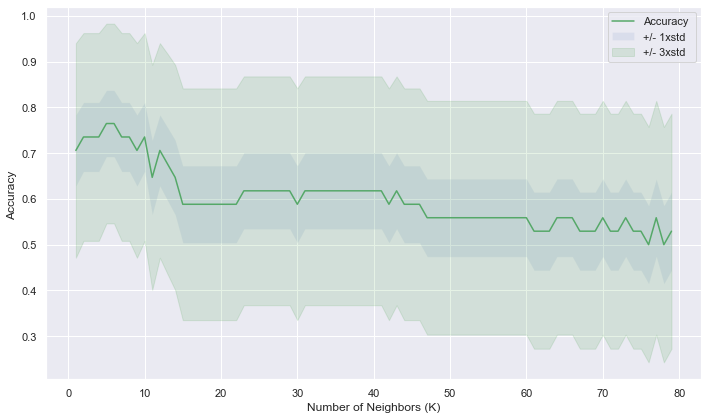

The best accuracy was with 0.7647058823529411 with k= 5


In [266]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, kneigh.predict(X_train)))
print("Test set Accuracy: ",  metrics.accuracy_score(y_test, yhat))
Ks = 80
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

## Model 2. Decision Tree

DecisionTrees's Accuracy:  0.7058823529411765


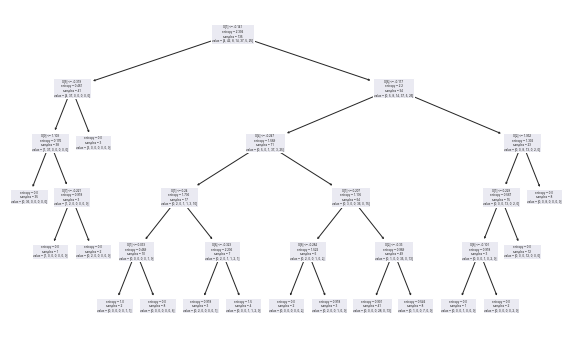

array(['LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'LT_Shallow', 'EST_Shallow', 'LV_Shallow', 'LT_Intermediate',
       'LT_Intermediate', 'LT_Shallow', 'LT_Shallow', 'LT_Shallow',
       'EST_Shallow', 'LT_Shallow', 'LV_Intermediate', 'LV_Intermediate',
       'LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'EST_Shallow', 'LT_Shallow', 'LT_Deep', 'LT_Shallow', 'LT_Shallow',
       'EST_Shallow', 'EST_Shallow', 'LT_Shallow', 'EST_Shallow',
       'EST_Shallow', 'LT_Deep', 'LT_Shallow', 'EST_Intermediate',
       'EST_Shallow'], dtype=object)

In [267]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
dTree.fit(X_train,y_train)
yhat2 = dTree.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat2))
tree.plot_tree(dTree)
plt.show()
yhat2[0:200]

## Model 3. Support Vector Machine

In [270]:
from sklearn import svm
svkmod = svm.SVC(kernel='rbf')
svkmod.fit(X_train, y_train) 
yhat3 = svkmod.predict(X_test)
yhat3 [0:30]

array(['LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'LT_Shallow', 'EST_Shallow', 'LV_Shallow', 'LT_Intermediate',
       'LT_Deep', 'LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'LT_Shallow', 'LV_Shallow', 'LT_Shallow', 'LT_Shallow',
       'LT_Shallow', 'LT_Shallow', 'EST_Shallow', 'EST_Shallow',
       'LT_Shallow', 'LT_Deep', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'EST_Shallow', 'LT_Shallow', 'LV_Shallow', 'EST_Shallow'],
      dtype=object)

In [271]:
from sklearn.metrics import f1_score

f1_score(y_test, yhat3, average='weighted') 

0.6649859943977592

## Model 4. Logistic Regression

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.02, solver='liblinear').fit(X_train,y_train)
yhat4 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
yhat4

array(['LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'LT_Shallow', 'EST_Shallow', 'EST_Shallow', 'LT_Intermediate',
       'LT_Deep', 'LT_Shallow', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'LT_Shallow', 'EST_Shallow', 'EST_Shallow', 'LT_Shallow',
       'LT_Shallow', 'LT_Shallow', 'EST_Shallow', 'EST_Shallow',
       'LT_Shallow', 'LT_Deep', 'LT_Shallow', 'LT_Shallow', 'EST_Shallow',
       'EST_Shallow', 'LT_Shallow', 'EST_Shallow', 'EST_Shallow',
       'LT_Deep', 'LT_Shallow', 'EST_Shallow', 'EST_Shallow'],
      dtype=object)

## Conclusions

In [273]:
#jaccard score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

knnj = jaccard_score(y_test, yhat, average='weighted') 
dtj = jaccard_score(y_test, yhat2, average='weighted')
svmj = jaccard_score(y_test, yhat3, average='weighted')
lrj = jaccard_score(y_test, yhat4, average='weighted')
print(knnj, dtj, svmj, lrj) 

#f1 score
knnf1 = f1_score(y_test, yhat1, average='weighted') 
dtf1 = f1_score(y_test, yhat2, average='weighted') 
svmf1 = f1_score(y_test, yhat3, average='weighted') 
lrf1 = f1_score(y_test, yhat4, average='weighted') 
print(knnf1, dtf1, svmf1, lrf1)

0.3333333333333333 0.5588235294117647 0.5471521942110177 0.4834558823529412
0.26356589147286824 0.6882891618185736 0.6649859943977592 0.5768325791855204


In [274]:
#report
rdf_cols = ['Algorithm', 'Jaccard Score' , 'F1 Score', 'Accuracy']
report_df = pd.DataFrame(columns=rdf_cols)
report_df = pd.DataFrame(index=range(4), columns = rdf_cols)
knn_row =['KNN', knnj, knnf1, metrics.accuracy_score(y_test, yhat)]
dtf_row =['Decision Tree', dtj, dtf1, metrics.accuracy_score(y_test, yhat2)]
svm_row =['SVM', svmj, svmf1, 'NaN']
lr_row =['Logistic Regression', lrj, lrf1, 'NaN']
report_df.loc[0] = knn_row
report_df.loc[1] = dtf_row
report_df.loc[2] = svm_row
report_df.loc[3] = lr_row
report_df

,Algorithm,Jaccard Score,F1 Score,Accuracy
0,KNN,0.333333,0.263566,0.529412
1,Decision Tree,0.558824,0.688289,0.705882
2,SVM,0.547152,0.664986,NaN
3,Logistic Regression,0.483456,0.576833,NaN


In [275]:
# full dataset for test (evaluation)

yhat5 = neigh.predict(X)
yhat6 = dTree.predict(X)
yhat7 = svkmod.predict(X)
yhat8 = LR.predict(X)


Confusion matrix, without normalization
[[ 0  5  0  0  2  0  0]
 [ 0 41  0  0 12  0  0]
 [ 0  0  0  0 11  0  0]
 [ 0  2  0  0 13  0  0]
 [ 0  1  0  0 46  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  5  0  0 26  0  0]]


C:\Users\pazus\AppData\Local\Temp\ipykernel_21316\758150360.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


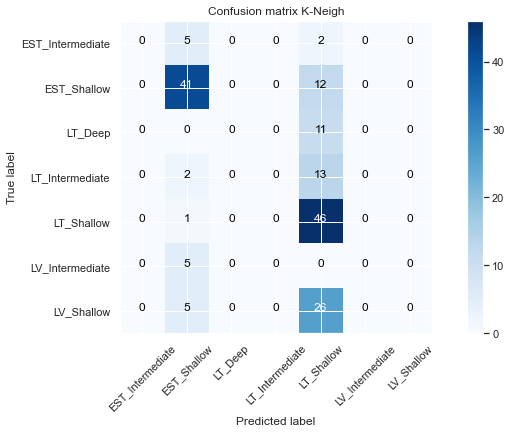

In [276]:
lbls = ['EST_Intermediate','EST_Shallow', 'LT_Deep', 'LT_Intermediate', 'LT_Shallow','LV_Intermediate', 'LV_Shallow']
from sklearn.metrics import confusion_matrix
import itertools
# Compute confusion matrix
cnf_matrix = confusion_matrix(y, yhat5)
cnf_matrix2 = confusion_matrix(y, yhat6)
cnf_matrix3 = confusion_matrix(y, yhat7)
cnf_matrix4 = confusion_matrix(y, yhat8)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix


plot_confusion_matrix(cnf_matrix, classes = lbls, normalize= False,  title='Confusion matrix K-Neigh')

Confusion matrix, without normalization
[[ 5  1  0  0  0  1  0]
 [ 0 50  0  0  3  0  0]
 [ 0  0 10  1  0  0  0]
 [ 0  0  0 14  0  1  0]
 [ 0  1  0  0 45  1  0]
 [ 0  0  0  0  0  5  0]
 [ 0  1  0  0 17  2 11]]


C:\Users\pazus\AppData\Local\Temp\ipykernel_21316\758150360.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


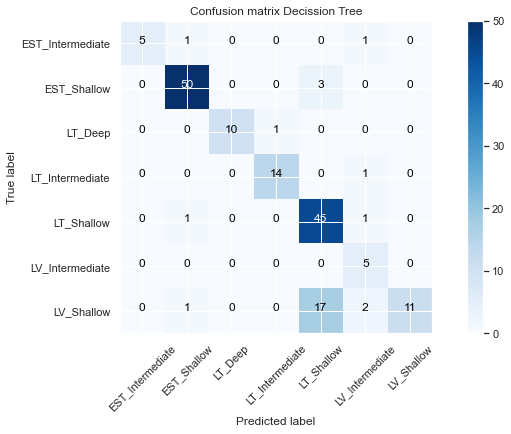

In [277]:
plot_confusion_matrix(cnf_matrix2, classes = lbls, normalize= False,  title='Confusion matrix Decission Tree')

Confusion matrix, without normalization
[[ 0  4  0  0  2  0  1]
 [ 0 42  0  0  8  0  3]
 [ 0  0 11  0  0  0  0]
 [ 0  0  0 13  1  0  1]
 [ 0  0  0  0 45  0  2]
 [ 0  0  0  1  0  0  4]
 [ 0  0  0  0 17  0 14]]


C:\Users\pazus\AppData\Local\Temp\ipykernel_21316\758150360.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


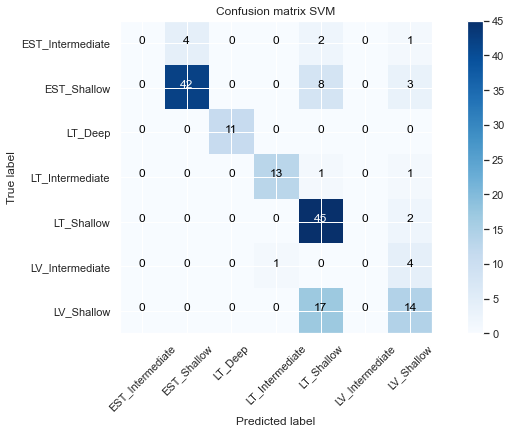

In [278]:
plot_confusion_matrix(cnf_matrix3, classes = lbls, normalize= False,  title='Confusion matrix SVM')

Confusion matrix, without normalization
[[ 0  7  0  0  0  0  0]
 [ 0 44  0  0  9  0  0]
 [ 0  0 11  0  0  0  0]
 [ 0  0  1 14  0  0  0]
 [ 0  1  0  0 46  0  0]
 [ 0  4  0  1  0  0  0]
 [ 0 11  0  0 19  0  1]]


C:\Users\pazus\AppData\Local\Temp\ipykernel_21316\758150360.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


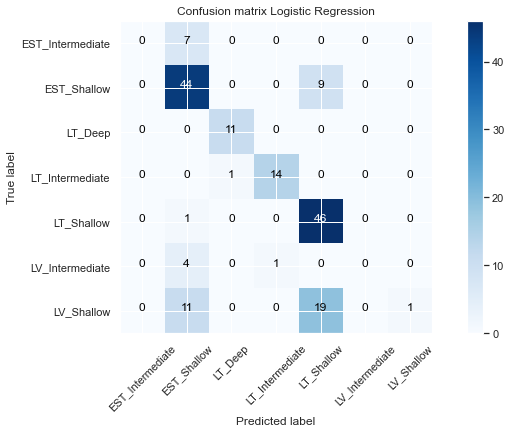

In [279]:
plot_confusion_matrix(cnf_matrix4, classes = lbls, normalize= False,  title='Confusion matrix Logistic Regression')

Two models are suited best for groundwater origin determination in Baltic states: Decision tree and Logistic regression.

## References
 - Juodkazis, V. (1980a). Formation and consumption of the groundwater resources of Baltic States [in Russian] (A. Zuzevičius, A. Grigelis, V. Juodkazis, V. Kadūnas, P. Suveizdis, & J. Vaitiekūnas, Eds.). Academy of Lithuania.
 - Juodkazis, V. (1980b). Hydrogeological Map of the Pre-quaternary Deposits of the Soviet Baltic Republics. Ministry of Geology of the USSR.
 - Mokrik, R., Samalavičius, V., Bujanauskas, M., & Gregorauskas, M. (2021). Environmental isotopes and noble gas ages of the deep groundwater with coupled flow modelling in the Baltic artesian basin. Lithuanian Journal of Physics, 61(1), 53–65.
 - Pärn, J., Raidla, V., Vaikmäe, R., Martma, T., Ivask, J., Mokrik, R., & Erg, K. (2016). The recharge of glacial meltwater and its influence on the geochemical evolution of groundwater in the Ordovician-Cambrian aquifer system, northern part of the Baltic Artesian Basin. Applied Geochemistry, 72, 125–135.
https://doi.org/10.1016/j.apgeochem.2016.07.007
 - Virbulis, J., Bethers, U., Saks, T., Sennikovs, J., & Timuhins, A. (2013). Hydrogeological model of the Baltic Artesian Basin. Hydrogeology Journal, 21(4), 845–862. https://doi.org/10.1007/s10040-013-0970-7
    

In [214]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')